In [1]:
#Loading the Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime as dt
import sklearn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import regex 

# DATA RETRIEVAL

In [3]:
customer_data = pd.read_csv("usage_data_final.csv")

In [4]:
customer_data.head()

,avg_daily_time,onboarded_age,VM_count,avg_url_count,most_hit_topic,City,trial_customer,Country,last_login,potention_buyer
0,68.95,35,61834,256.09,Multi-channeled,Wrightburgh,0,Tunisia,3/27/16 0:53,0
1,80.23,31,68442,193.77,Data warehouse,West Jodi,1,Nauru,4/4/16 1:39,0
2,69.47,26,59786,236.50,Customer-focused,Davidton,0,San Marino,3/13/16 20:35,0
3,74.15,29,54806,245.89,Triple-buffered,West Terrifurt,1,Italy,1/10/16 2:31,0
4,68.37,35,73890,225.58,Triple-buffered,South Manuel,0,Iceland,6/3/16 3:36,0


# DATA CLEANING & DROPPING COLUMNS NOT NEEDED

In [5]:
## Data Cleaning and filtering 
#dropping an Column not needed 
print('number of columns :{}'.format(len(customer_data.columns)))
print ('number of columns :{}'.format(customer_data.columns))


number of columns :10
number of columns :Index(['avg_daily_time', 'onboarded_age', 'VM_count ', 'avg_url_count',
       'most_hit_topic', 'City', 'trial_customer', 'Country', 'last_login',
       'potention_buyer'],
      dtype='object')


In [6]:
customer_data['id']= customer_data.index
customer_data['customer_name'] = customer_data.apply(lambda row: "company"+ str(row.id) , axis=1)


In [7]:

customer_data.head()

,avg_daily_time,onboarded_age,VM_count,avg_url_count,most_hit_topic,City,trial_customer,Country,last_login,potention_buyer,id,customer_name
0,68.95,35,61834,256.09,Multi-channeled,Wrightburgh,0,Tunisia,3/27/16 0:53,0,0,company0
1,80.23,31,68442,193.77,Data warehouse,West Jodi,1,Nauru,4/4/16 1:39,0,1,company1
2,69.47,26,59786,236.50,Customer-focused,Davidton,0,San Marino,3/13/16 20:35,0,2,company2
3,74.15,29,54806,245.89,Triple-buffered,West Terrifurt,1,Italy,1/10/16 2:31,0,3,company3
4,68.37,35,73890,225.58,Triple-buffered,South Manuel,0,Iceland,6/3/16 3:36,0,4,company4


In [9]:
#making use of regex library
customer_data['updated_url'] = customer_data['most_hit_topic'].replace('/#/#/','/#/',regex=True)
customer_data.head()

,avg_daily_time,onboarded_age,VM_count,avg_url_count,most_hit_topic,City,trial_customer,Country,last_login,potention_buyer,id,customer_name,updated_url
0,68.95,35,61834,256.09,Multi-channeled,Wrightburgh,0,Tunisia,3/27/16 0:53,0,0,company0,Multi-channeled
1,80.23,31,68442,193.77,Data warehouse,West Jodi,1,Nauru,4/4/16 1:39,0,1,company1,Data warehouse
2,69.47,26,59786,236.50,Customer-focused,Davidton,0,San Marino,3/13/16 20:35,0,2,company2,Customer-focused
3,74.15,29,54806,245.89,Triple-buffered,West Terrifurt,1,Italy,1/10/16 2:31,0,3,company3,Triple-buffered
4,68.37,35,73890,225.58,Triple-buffered,South Manuel,0,Iceland,6/3/16 3:36,0,4,company4,Triple-buffered


In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
avg_daily_time     1000 non-null float64
onboarded_age      1000 non-null int64
VM_count           1000 non-null int64
avg_url_count      1000 non-null float64
most_hit_topic     1000 non-null object
City               1000 non-null object
trial_customer     1000 non-null int64
Country            1000 non-null object
last_login         1000 non-null object
potention_buyer    1000 non-null int64
id                 1000 non-null int64
customer_name      1000 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 93.8+ KB


In [53]:
customer_data.describe()

,avg_daily_time,onboarded_age,VM_count,avg_url_count,trial_customer,potention_buyer,id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,65.000200,36.009000,55000.011000,180.000100,0.481000,0.50000,499.500000
std,15.853615,8.785562,13414.639459,43.902339,0.499889,0.50025,288.819436
min,32.600000,19.000000,13997.000000,104.780000,0.000000,0.00000,0.000000
25%,51.360000,29.000000,47031.750000,138.830000,0.000000,0.00000,249.750000
50%,68.215000,35.000000,57012.500000,183.130000,0.000000,0.50000,499.500000
75%,78.547500,42.000000,65470.750000,218.792500,1.000000,1.00000,749.250000
max,91.430000,61.000000,79485.000000,269.960000,1.000000,1.00000,999.000000


In [54]:
customer_data.head()

,avg_daily_time,onboarded_age,VM_count,avg_url_count,most_hit_topic,City,trial_customer,Country,last_login,potention_buyer,id,customer_name
0,68.95,35,61834,256.09,Multi-channeled,Wrightburgh,0,Tunisia,3/27/16 0:53,0,0,company0
1,80.23,31,68442,193.77,Data warehouse,West Jodi,1,Nauru,4/4/16 1:39,0,1,company1
2,69.47,26,59786,236.50,Customer-focused,Davidton,0,San Marino,3/13/16 20:35,0,2,company2
3,74.15,29,54806,245.89,Triple-buffered,West Terrifurt,1,Italy,1/10/16 2:31,0,3,company3
4,68.37,35,73890,225.58,Triple-buffered,South Manuel,0,Iceland,6/3/16 3:36,0,4,company4


In [55]:
customer_data.columns

Index(['avg_daily_time', 'onboarded_age', 'VM_count ', 'avg_url_count',
       'most_hit_topic', 'City', 'trial_customer', 'Country', 'last_login',
       'potention_buyer', 'id', 'customer_name'],
      dtype='object')

In [56]:
# Renamed some columns for spell check
customer_data = customer_data.rename(index=str, columns={"VM_count ": "vm_count", "potention_buyer": "potential_buyer"})
customer_data.head()

,avg_daily_time,onboarded_age,vm_count,avg_url_count,most_hit_topic,City,trial_customer,Country,last_login,potential_buyer,id,customer_name
0,68.95,35,61834,256.09,Multi-channeled,Wrightburgh,0,Tunisia,3/27/16 0:53,0,0,company0
1,80.23,31,68442,193.77,Data warehouse,West Jodi,1,Nauru,4/4/16 1:39,0,1,company1
2,69.47,26,59786,236.50,Customer-focused,Davidton,0,San Marino,3/13/16 20:35,0,2,company2
3,74.15,29,54806,245.89,Triple-buffered,West Terrifurt,1,Italy,1/10/16 2:31,0,3,company3
4,68.37,35,73890,225.58,Triple-buffered,South Manuel,0,Iceland,6/3/16 3:36,0,4,company4


In [57]:
#Converting Float to Int dtypes
customer_data[['avg_daily_time','avg_url_count']] = customer_data[['avg_daily_time','avg_url_count']].astype(int,copy = True)


In [58]:
#Rearranging columns by sequence
customer_data = customer_data[['id','customer_name','City','Country','last_login','onboarded_age','vm_count','avg_daily_time','avg_url_count','most_hit_topic','trial_customer','potential_buyer']]
customer_data.head()

,id,customer_name,City,Country,last_login,onboarded_age,vm_count,avg_daily_time,avg_url_count,most_hit_topic,trial_customer,potential_buyer
0,0,company0,Wrightburgh,Tunisia,3/27/16 0:53,35,61834,68,256,Multi-channeled,0,0
1,1,company1,West Jodi,Nauru,4/4/16 1:39,31,68442,80,193,Data warehouse,1,0
2,2,company2,Davidton,San Marino,3/13/16 20:35,26,59786,69,236,Customer-focused,0,0
3,3,company3,West Terrifurt,Italy,1/10/16 2:31,29,54806,74,245,Triple-buffered,1,0
4,4,company4,South Manuel,Iceland,6/3/16 3:36,35,73890,68,225,Triple-buffered,0,0


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text yticklabel objects>)

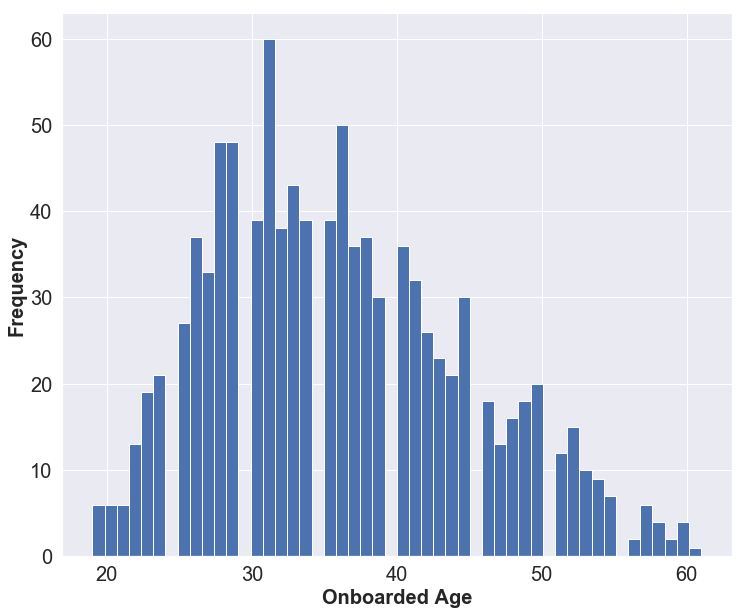

In [59]:
#Now lets explore the age groups we have  
plot = customer_data["onboarded_age"].plot.hist(bins=50,figsize=(12,10))
plot.set_xlabel('Onboarded Age',fontsize = 20, fontweight='bold')
plot.set_ylabel('Frequency',fontsize = 20, fontweight='bold')
plt.xticks(size =20)
plt.yticks(size =20)

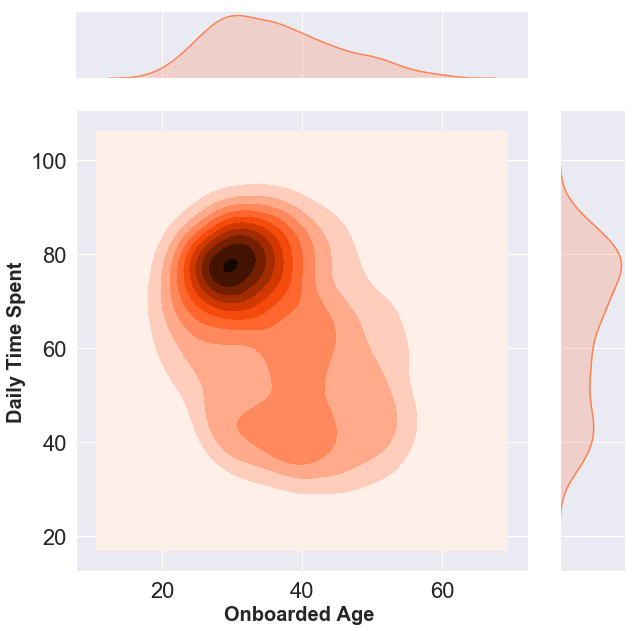

In [60]:
a = sns.jointplot(x = 'onboarded_age', y  ='avg_daily_time', data = customer_data,space = 0.5,kind='kde' ,color ='coral',height = 9)
a.set_axis_labels('Onboarded Age ', 'Daily Time Spent', fontsize=20, fontweight='bold')
sns.set(font_scale = 2)

/Users/amangal/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


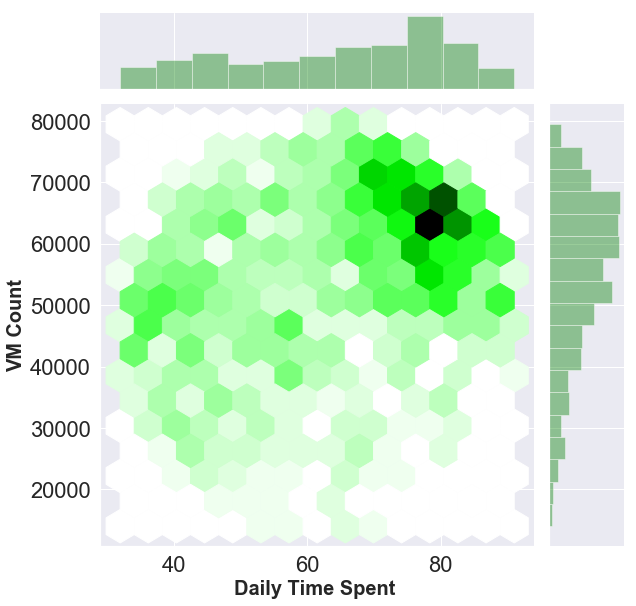

In [61]:
b = sns.jointplot(x ='avg_daily_time',y='vm_count',height =9 ,data = customer_data,kind ='hex', color = 'green')
b.set_axis_labels('Daily Time Spent ', 'VM Count', fontsize=20, fontweight='bold')
sns.set(font_scale = 2)


/Users/amangal/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


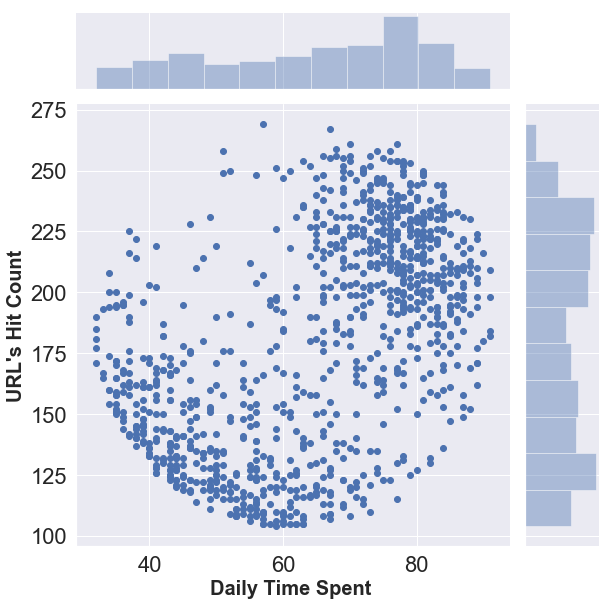

In [62]:
#Finding corerelations in features  using Seaborn jointplots 
c = sns.jointplot(x ='avg_daily_time',y='avg_url_count',height =9 ,data = customer_data,kind='scatter')
c.set_axis_labels('Daily Time Spent ', "URL's Hit Count", fontsize=20, fontweight='bold')
sns.set(font_scale = 2)


In [63]:
numerical_data_df = customer_data[['vm_count','avg_daily_time','avg_url_count','onboarded_age','trial_customer','most_hit_topic']]
numerical_data_df.head()
#sns.countplot(x = 'most_hit_topic', data = customer_data, palette= 'viridis')


,vm_count,avg_daily_time,avg_url_count,onboarded_age,trial_customer,most_hit_topic
0,61834,68,256,35,0,Multi-channeled
1,68442,80,193,31,1,Data warehouse
2,59786,69,236,26,0,Customer-focused
3,54806,74,245,29,1,Triple-buffered
4,73890,68,225,35,0,Triple-buffered


Text(0, 0.5, 'Top Hit URLS')

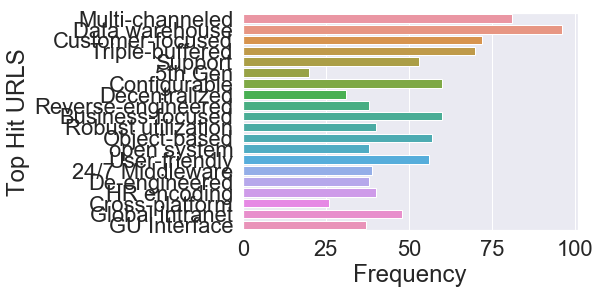

In [64]:
# Count plot for Most hit Topics


a = sns.countplot(y = 'most_hit_topic' ,data = customer_data)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 2)
plt.rcParams["axes.labelsize"] = 30
plt.xlabel('Frequency')
plt.ylabel('Top Hit URLS')


In [65]:
customer_data['most_hit_topic'].value_counts()

Data warehouse        96
Multi-channeled       81
Customer-focused      72
Triple-buffered       70
Business-focused      60
Configurable          60
Object-based          57
User-friendly         56
Support               53
Global intranet       48
Robust utilization    40
HR encoding           40
24/7 Middleware       39
De-engineered         38
Reverse-engineered    38
open system           38
GU Interface          37
Decentralized         31
Cross-platform        26
5th Gen               20
Name: most_hit_topic, dtype: int64

In [66]:
customer_data['vm_count'].max()

79485

In [67]:
from sklearn.model_selection import train_test_split


In [68]:
X = customer_data[['avg_daily_time', 'onboarded_age', 'vm_count', 'avg_url_count']]
y = customer_data['potential_buyer']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
predictions = model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


             precision    recall  f1-score   support

          0       0.84      0.97      0.90       146
          1       0.96      0.83      0.89       154

avg / total       0.90      0.90      0.90       300



In [76]:
print("Lets print the confusion matrix")
print(confusion_matrix(y_test,predictions))

Lets print the confusion matrix
[[141   5]
 [ 26 128]]


In [86]:
#Lets calculate MSE and R2
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.10333333333333333, R2: 0.8966666666666666


In [77]:
from collections import defaultdict
def report2dict(cr):
    # Parse rows
    tmp = list()
    for row in cr.split("\n"):
        parsed_row = [x for x in row.split("  ") if len(x) > 0]
        if len(parsed_row) > 0:
            tmp.append(parsed_row)
    
    # Store in dictionary
    measures = tmp[0]

    D_class_data = defaultdict(dict)
    for row in tmp[1:]:
        class_label = row[0]
        for j, m in enumerate(measures):
            D_class_data[class_label][m.strip()] = float(row[j + 1].strip())
    return D_class_data

In [78]:
dictA = report2dict(classification_report(y_test,predictions))
df_report  = pd.DataFrame(dictA).T
dictA

defaultdict(dict,
            {'0': {'precision': 0.84,
              'recall': 0.97,
              'f1-score': 0.9,
              'support': 146.0},
             '1': {'precision': 0.96,
              'recall': 0.83,
              'f1-score': 0.89,
              'support': 154.0},
             'avg / total': {'precision': 0.9,
              'recall': 0.9,
              'f1-score': 0.9,
              'support': 300.0}})

In [79]:
df_report  = pd.DataFrame(dictA).T

df_report

,f1-score,precision,recall,support
0,0.90,0.84,0.97,146.0
1,0.89,0.96,0.83,154.0
avg / total,0.90,0.90,0.90,300.0


In [80]:

df_results =pd.DataFrame({"Prediction": predictions, "Actual": y_test})
df_results.head()

,Prediction,Actual
521,0,1
737,1,1
740,1,1
660,1,1
411,0,0


In [81]:
# where model values are not macthing 
df_nonMatch=df_results[df_results["Prediction"]!= df_results["Actual"]]

In [82]:
df_nonMatch.shape

(31, 2)

In [83]:
df_nonMatch

,Prediction,Actual
521,0,1
139,1,0
584,0,1
312,0,1
590,0,1
289,0,1
589,0,1
451,0,1
787,0,1
432,0,1


In [39]:
#Nove predicting using unknown data
print("predicting a single vlaue ")

print (model.predict([[83.42,25,49851,183.42]]))

predicting a single vlaue 
[0]


In [41]:
#now lets save the model 
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [42]:
# Now lest Load the saved model and predict from there 

loaded_model = pickle.load(open(filename, 'rb'))


print (loaded_model.predict([[83.42,25,49851,183.42]]))

[0]


In [43]:
predictions  = loaded_model.predict([[83.42,25,49851,183.42]])
df_results =pd.DataFrame({"Prediction": predictions})
print(df_results)
data = df_results.to_dict()
data

   Prediction
0           0


{'Prediction': {0: 0}}